## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There is 1 csv file in the current version of the dataset:


In [2]:
print(os.listdir('../input'))

['images', 'resized', 'artists.csv']


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: ../input/artists.csv

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('../input/artists.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'artists.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 50 rows and 8 columns


Let's take a quick look at what the data looks like:

In [5]:
df1.head(5)

NameError: name 'df1' is not defined

Distribution graphs (histogram/bar graph) of sampled columns:

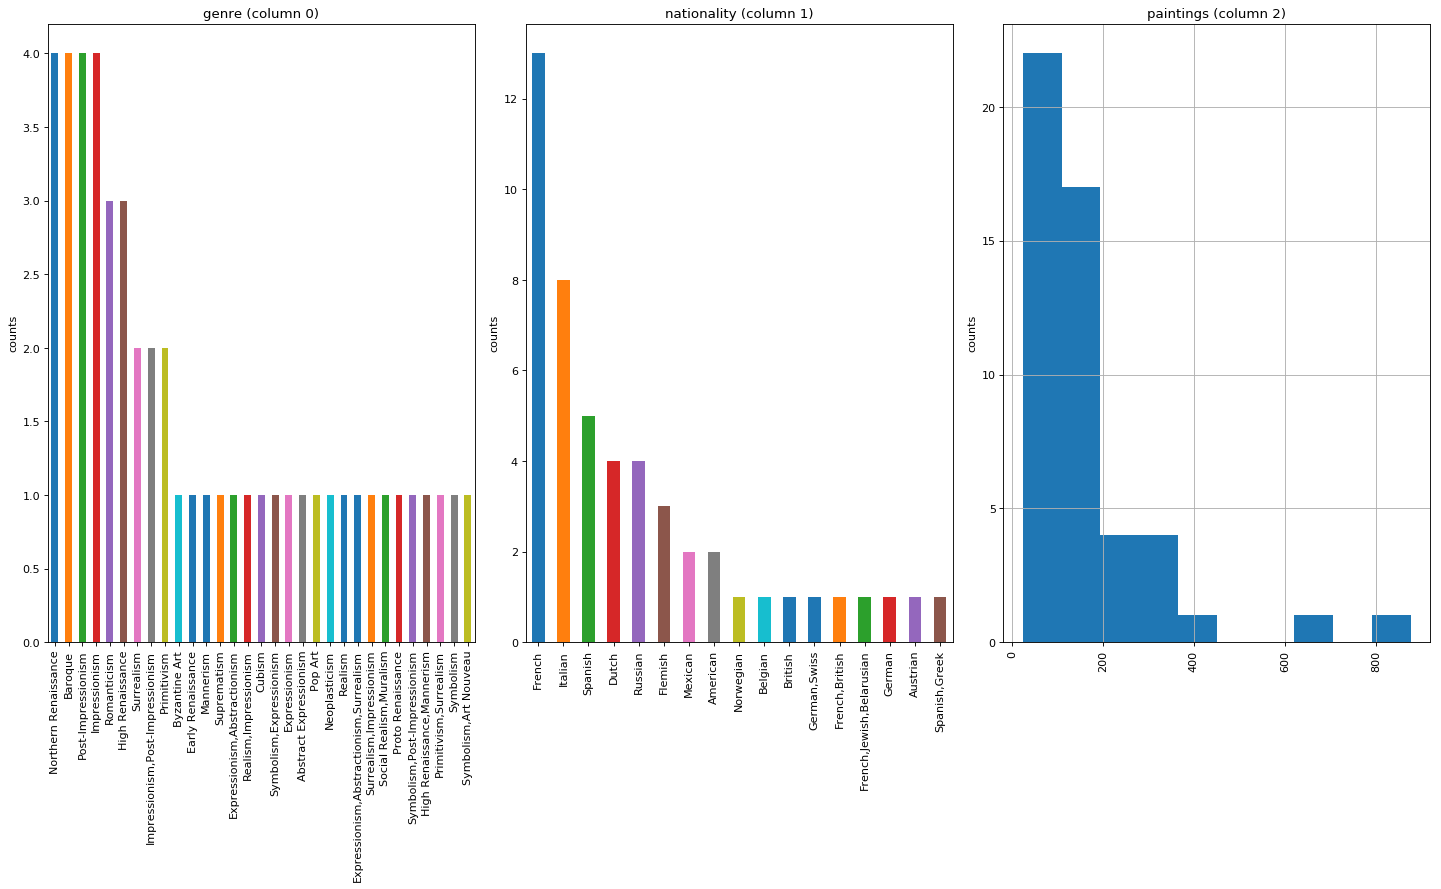

In [8]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

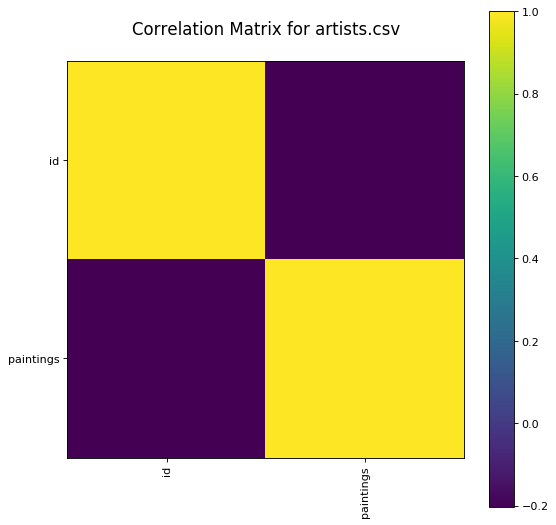

In [9]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

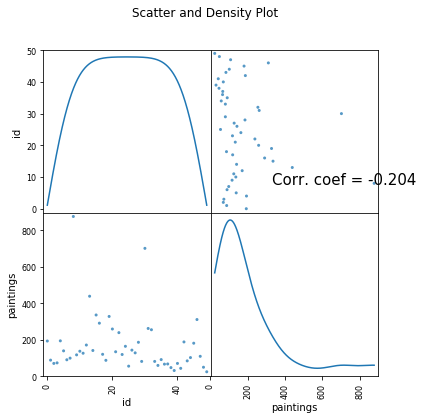

In [10]:
plotScatterMatrix(df1, 6, 15)

## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Fork Notebook" button at the top of this kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!

In [1]:

thisdict = {
    "name": "Amedeo Modigliani",
    "years": "1884-1920",
    "genre": "Expressionism",
    "nationality": "Italian",
    "paintings": "193"
}
thisdict2 = {
    "name": "Vasiliy Kandinskiy",
    "years": "1866-1944",
    "genre": "Expressionism/Abstractionism",
    "nationality": "Russian",
    "paintings": "88"
}
thisdict3 = {
    "name": "Diego Rivera",
    "years": "1886-1944",
    "genre": "Social Realism/Muralism",
    "nationality": "Mexican",
    "paintings": "70"
}
thisdict4 = {
    "name": "Claude Monet",
    "years": "1840-1926",
    "genre": "Impressionism",
    "nationality":"French",
    "paintings": "73"
}
thisdict5 = {
    "name": "Rene Magritte",
    "years": "1840-1926",
    "genre": "Surrealism,Impressionism",
    "nationality":"Belgian",
    "paintings": "194",
}
thisdict6 = {
    "name": "Salvador Dali",
    "years": "1904 - 1989",
    "genre": "Surrealism",
    "nationality":"Spanish",
    "paintings": "139",
}
thisdict7 = {
    "name": "Edouard Manet",
    "years": "1832 - 1883",
    "genre": "Realism,Impressionism",
    "nationality":"French",
    "paintings": "90",
}
thisdict8 = {
    "name": "Charles Rennie Mackintosh",
    "years": "1868 - 1928",
    "genre": "Art Nouveau",
    "nationality":"Scottish",
    "paintings": "50",
}
thisdict9 = {
    "name": "Vincent van Gogh",
    "years": "1853 - 1890",
    "genre": "Post-Impressionism",
    "nationality":"Dutch",
    "paintings": "877",
}
thisdict10 = {
    "name": "Pablo Picasso",
    "years": "1881 - 1973",
    "genre": "Cubism",
    "nationality":"Spanish",
    "paintings": "439",
}
thisdict11 = {
    "name": "Leonardo da Vinci",
    "years": "1452 - 1519",
    "genre": "High Renaissance",
    "nationality":"Italian",
    "paintings": "143",
}
thisdict12 = {
    "name": "Andy Warhol",
    "years": "1928 - 1987",
    "genre": "Pop Art",
    "nationality":"American",
    "paintings": "181",
}
thisdict13 = {
    "name": "Jean-Michel Basquiat",
    "years": "1960 - 1988",
    "genre": "Neo Expressionism",
    "nationality":"American",
    "paintings": "600",
}
thisdict14 = {
    "name": "Arthur Rackham",
    "years": "1867 - 1939",
    "genre": "Nordic fantasy",
    "nationality":"English",
    "paintings": "161",
}

In [9]:
pip install -U matplotlib


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/2e/51/c77a14869b7eb9d6fb440e811b754fc3950d6868c38ace57d0632b674415/matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/ae/a6353db548bff1a592b85ae6bb80275f0a51dc25a0410d059e5b33183e36/contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/81/4b/42d0488765ea5aa308b4e8197cb75366b2124240a73e86f98b6107ccf282/fonttools-4.47.2-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/160.8 kB ? eta -:-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


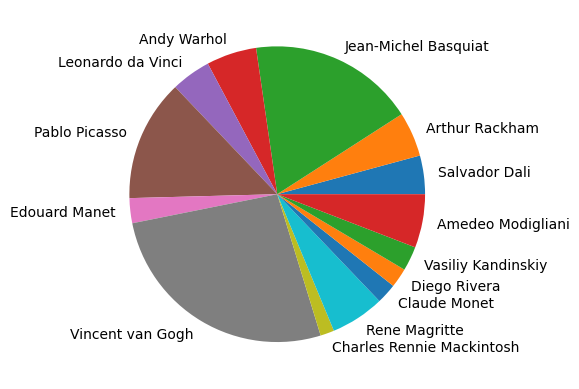

In [7]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([139,161, 600, 181, 143, 439, 90, 877, 50, 
             194, 73, 70, 88, 193,])
mylabels = ["Salvador Dali",
            "Arthur Rackham",
            "Jean-Michel Basquiat",
            "Andy Warhol",
            "Leonardo da Vinci",
            "Pablo Picasso",
            "Edouard Manet",
            "Vincent van Gogh",
            "Charles Rennie Mackintosh",            
            "Rene Magritte",
            "Claude Monet",
            "Diego Rivera",
            "Vasiliy Kandinskiy",
            "Amedeo Modigliani"]
plt.pie(y, labels = mylabels)
plt.show() 

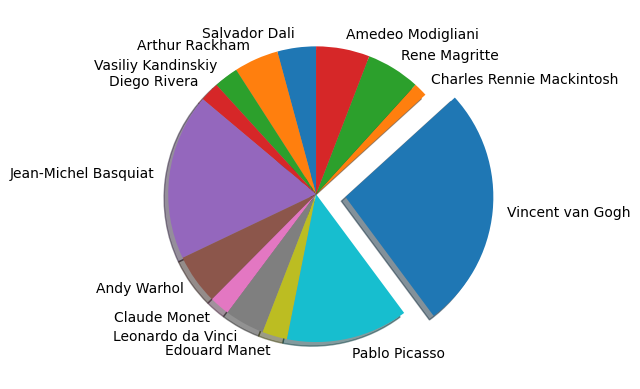

In [23]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([139, 161, 88, 70, 600, 181, 73, 143, 90, 439, 877, 50, 
             194, 193,])
mylabels = ["Salvador Dali",
            "Arthur Rackham",
            "Vasiliy Kandinskiy",
            "Diego Rivera",
            "Jean-Michel Basquiat",
            "Andy Warhol",
            "Claude Monet",
            "Leonardo da Vinci",
            "Edouard Manet",
            "Pablo Picasso",
            "Vincent van Gogh",
            "Charles Rennie Mackintosh",            
            "Rene Magritte",
            "Amedeo Modigliani"]
myexplode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0]
plt.pie(y, labels = mylabels,startangle = 90,explode = myexplode,shadow = True)

plt.show() 

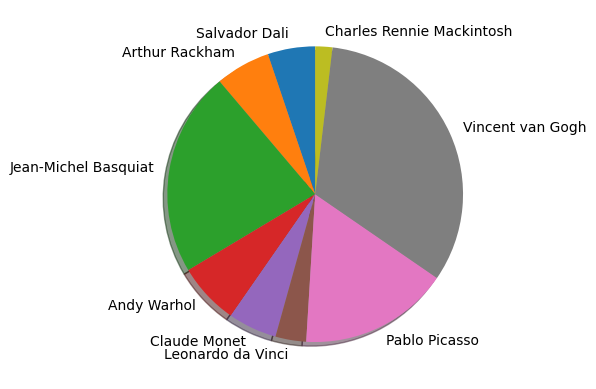

In [28]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([139, 161, 600, 181, 143, 90, 439, 877, 50, 
             ])
mylabels = ["Salvador Dali",
            "Arthur Rackham",
            "Jean-Michel Basquiat",
            "Andy Warhol",
            "Claude Monet",
            "Leonardo da Vinci",
            "Pablo Picasso",
            "Vincent van Gogh",
            "Charles Rennie Mackintosh",            
]
myexplode = [0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(y, labels = mylabels,startangle = 90,explode = myexplode,shadow = True)

plt.show() 

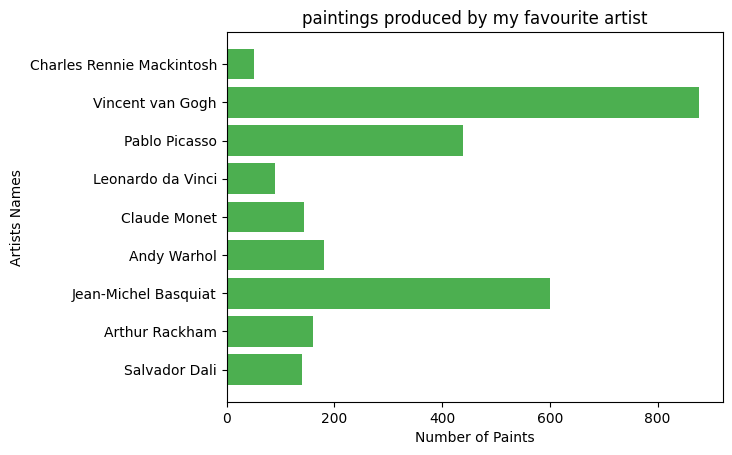

In [153]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["Salvador Dali",
            "Arthur Rackham",
            "Jean-Michel Basquiat",
            "Andy Warhol",
            "Claude Monet",
            "Leonardo da Vinci",
            "Pablo Picasso",
            "Vincent van Gogh",
            "Charles Rennie Mackintosh"]) 
y = np.array([139, 161, 600, 181, 143, 90, 439, 877, 50, 
             ])
plt.barh(x, y,color = "#4CAF50")
plt.title('paintings produced by my favourite artist')
plt.xlabel('Number of Paintings')
plt.ylabel('Artists Names')
plt.show(8)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


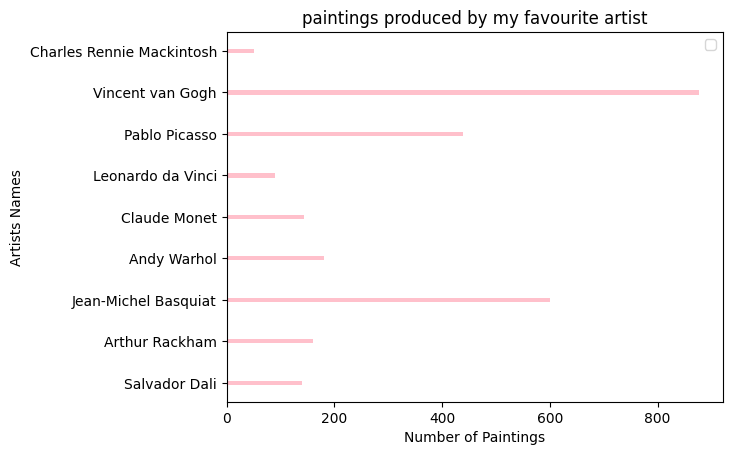

In [169]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["Salvador Dali",
            "Arthur Rackham",
            "Jean-Michel Basquiat",
            "Andy Warhol",
            "Claude Monet",
            "Leonardo da Vinci",
            "Pablo Picasso",
            "Vincent van Gogh",
            "Charles Rennie Mackintosh"]) 
y = np.array([139, 161, 600, 181, 143, 90, 439, 877, 50, 
             ])

plt.barh(x, y, color = "pink", height = 0.1,)
plt.title('paintings produced by my favourite artist')
plt.xlabel('Number of Paintings')
plt.ylabel('Artists Names')



plt. legend()
plt.show(8)
